In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

path = "/Users/matteo/Projects/MFI_matteo/MFI/"
os.chdir(path)

from pyMFI import MFI
# from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)


In [2]:
path_data = "/Users/matteo/Projects/MFI_matteo/MFI/Manuscript_Results/Figure1B/"

# #Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name=path_data + "HILLS40")

NH=1000

# #Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name=path_data + "position40")
start=time.time()
# #Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 100, WellTempered=1, nhills=NH, periodic=1)
end=time.time()
print(end-start)

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

Total no. of Gaussians analysed: 1000
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()


/Users/matteo/Projects/MFI_matteo/MFI/pyMFI/MFI.py:448: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 200)
()
(200, 

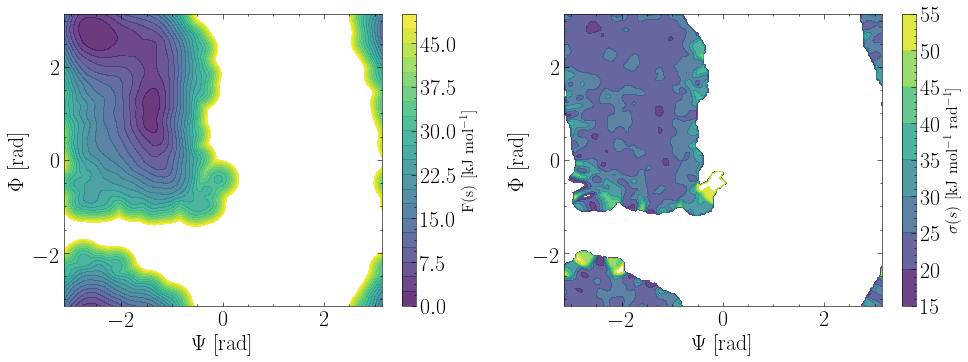

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(15, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure1B_1', dpi=600, bbox_inches='tight')

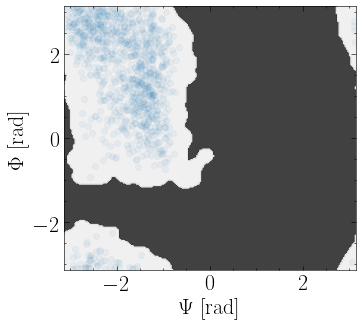

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_3', dpi=600, bbox_inches='tight')

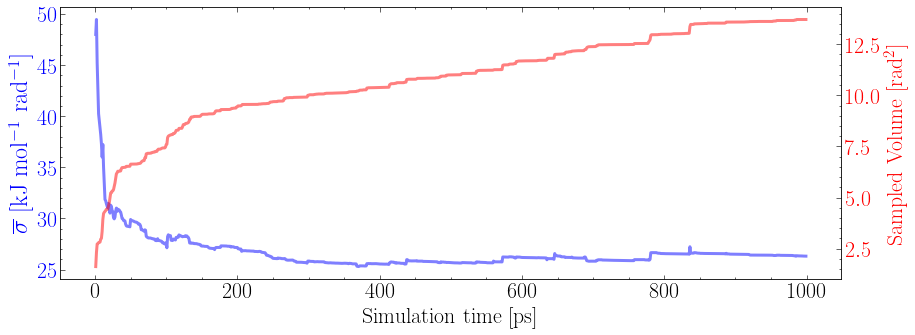

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))
axs.plot( [time for time in time_history[1:]], (ofe_history[1:NH]),color='blue',alpha=0.5,linewidth=3);
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$ rad$^{-1}$]',fontsize=24, color='blue')
axs.tick_params(axis ='y', labelcolor = 'blue')
axs.set_xlabel('Simulation time [ps]')

V=np.multiply(volume_history[1:NH],np.power(2*np.pi/200,2))
ax2 = axs.twinx()
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('Sampled Volume [rad$^2$]',color='red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:NH],np.power(2*np.pi/200,2)),color='red',alpha=0.5,linewidth=3);

plt.savefig('Figure1B_2', dpi=600, bbox_inches='tight')

/Users/matteo/Projects/MFI_paper_figures/pyMFI/MFI.py:651: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append(sum(sum(ofe_cut)) / (np.count_nonzero(ofe_cut)))


|50/500|=> Avr OFE: 41.39 *** |100/500|=> Avr OFE: 35.47 *** |150/500|=> Avr OFE: 35.67 *** |200/500|=> Avr OFE: 35.65 *** |250/500|=> Avr OFE: 33.41 *** |300/500|=> Avr OFE: 32.85 *** |350/500|=> Avr OFE: 32.47 *** |400/500|=> Avr OFE: 32.4 *** |450/500|=> Avr OFE: 33.35 *** |500/500|=> Avr OFE: 32.87 *** 

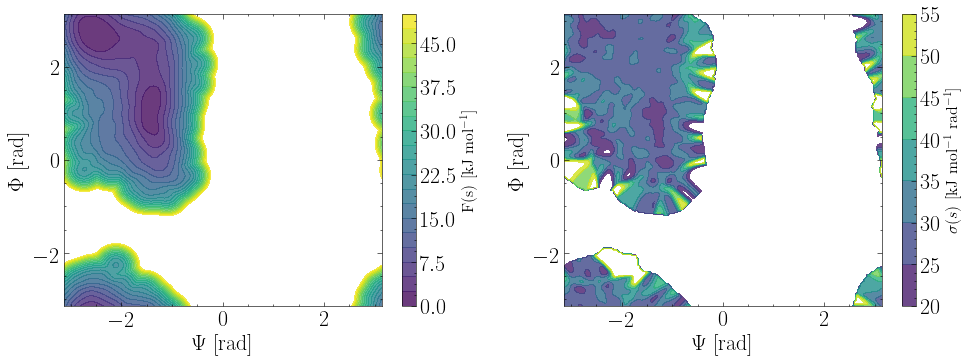

In [ ]:
# #Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name=path + "HILLS40")

NH=500

# #Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name=path + "position40")

# #Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 10, error_pace = NH, WellTempered=1, nhills=NH, periodic=1)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(20, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()   



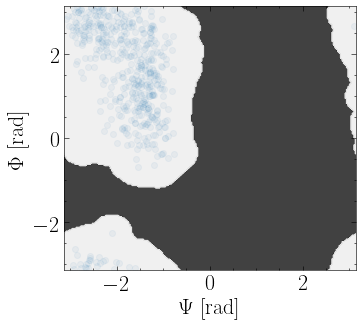

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_4', dpi=600, bbox_inches='tight')

|200/2000|=> Avr OFE: 35.65 *** |400/2000|=> Avr OFE: 32.4 *** |600/2000|=> Avr OFE: 34.59 *** |800/2000|=> Avr OFE: 34.18 *** |1000/2000|=> Avr OFE: 33.9 *** |1200/2000|=> Avr OFE: 36.72 *** |1400/2000|=> Avr OFE: 35.38 *** |1600/2000|=> Avr OFE: 34.08 *** |1800/2000|=> Avr OFE: 34.04 *** |2000/2000|=> Avr OFE: 34.53 *** 

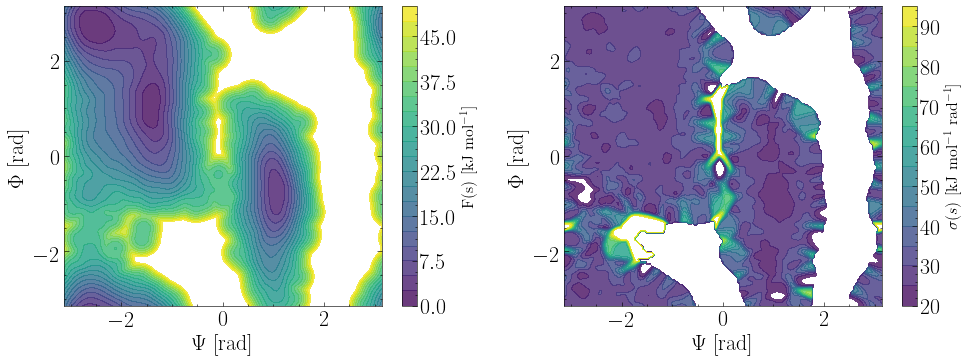

In [ ]:
# #Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name=path + "HILLS40")

NH=2000

# #Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name=path + "position40")

# #Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 10, error_pace = NH, WellTempered=1, nhills=NH, periodic=1)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(20, 100, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()  

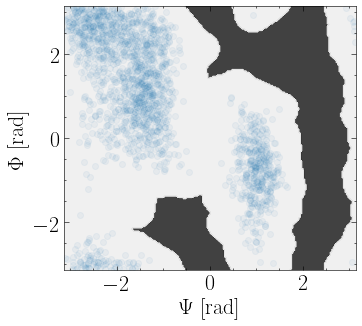

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_5', dpi=600, bbox_inches='tight')